# US 2020 Presidential Election: Prediction by County Demographics

In this capstone project we will build a machine learning model to predict the results of the 2020 US Presidential Election by county based on county demographics.

## Get Election Data

We need to get the county level election data that was downloaded from Kaggle by RAPHAEL FONTES

https://www.kaggle.com/datasets/unanimad/us-election-2020

# Deliverable 1: Exploratory Data Analysis
In this first notebook, we will explore the Data from the 2020 US Presidential Election

In [1]:
#Import relavent Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

In [2]:
pres_results2020=pd.read_csv('Data-US Presidential Election/president_county_candidate.csv')
pres_results2020.sort_values(['state','county'],inplace=True)
pres_results2020.reset_index(inplace=True,drop=True)
pres_results2020.head()


,state,county,candidate,party,total_votes,won
0,Alabama,Autauga County,Donald Trump,REP,19838,True
1,Alabama,Autauga County,Joe Biden,DEM,7503,False
2,Alabama,Autauga County,Jo Jorgensen,LIB,350,False
3,Alabama,Autauga County,Write-ins,WRI,79,False
4,Alabama,Baldwin County,Donald Trump,REP,83544,True


This tells us the total votes per candidate per county. We want the percentage for each candidate. The total number of votes in each county is in another file. 



In [3]:
pres_results_votes=pd.read_csv('Data-US Presidential Election/president_county.csv')
pres_results_votes.sort_values(['state','county'],inplace=True)
pres_results_votes.reset_index(inplace=True,drop=True)
pres_results_votes.head()

,state,county,current_votes,total_votes,percent
0,Alabama,Autauga County,27770,27770,100
1,Alabama,Baldwin County,109679,109679,100
2,Alabama,Barbour County,10518,10518,100
3,Alabama,Bibb County,9595,9595,100
4,Alabama,Blount County,27588,27588,100


In [4]:
pres_results_votes=pres_results_votes.rename(columns={'total_votes':'total_votes_county'})


In [5]:
pres_results_votes=pres_results_votes[['state','county','total_votes_county']]
pres_results2020=pres_results2020.merge(pres_results_votes,on=['state','county'])
#pres_results2020[pres_results2020['total_votes_county']>pres_results2020['total_votes']]

In [6]:
pres_results2020b=pres_results2020[pres_results2020['candidate']=='Joe Biden']
pres_results2020b[pres_results2020b['total_votes_county']<pres_results2020b['total_votes']]

,state,county,candidate,party,total_votes,won,total_votes_county
5810,Illinois,Bond County,Joe Biden,DEM,2288,False,1160
5845,Illinois,Carroll County,Joe Biden,DEM,2748,False,1062
7881,Kansas,Atchison County,Joe Biden,DEM,2314,False,362
15700,Minnesota,Mille Lacs County,Joe Biden,DEM,4404,False,462
16349,Mississippi,Holmes County,Joe Biden,DEM,6588,True,6542


In [7]:
pres_results2020['PCT_VOTE']=pres_results2020['total_votes']/pres_results2020['total_votes_county']

#pres_results2020=pres_results2020.replace({'state': us_state_to_abbrev})
pres_results2020_Biden=pres_results2020[pres_results2020['candidate']=='Joe Biden']
pres_results2020_Trump=pres_results2020[pres_results2020['candidate']=='Donald Trump']

pres_results2020_Biden=pres_results2020_Biden[['state','county','PCT_VOTE']]
pres_results2020_Trump=pres_results2020_Trump[['state','county','PCT_VOTE']]

pres_results2020_Biden=pres_results2020_Biden.rename(columns={'PCT_VOTE':'PCT_VOTE_BIDEN'})
pres_results2020_Trump=pres_results2020_Trump.rename(columns={'PCT_VOTE':'PCT_VOTE_TRUMP'})

pres_results2020=pres_results2020_Trump.merge(pres_results2020_Biden,on=['state','county'])
#pres_results2020=pres_results2020[pres_results2020['state']!=pres_results2020['county']]




Now make a column that gives the value 1 if Biden won the county, and 0 if Trump won the county

In [8]:
def f(row):
    if row['PCT_VOTE_BIDEN'] > row['PCT_VOTE_TRUMP']:
        val = 1
    else:
        val = 0
    return val

pres_results2020['County Result'] = pres_results2020.apply(f, axis=1)


pres_results2020.head()

,state,county,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result
0,Alabama,Autauga County,0.714368,0.270184,0
1,Alabama,Baldwin County,0.761714,0.224090,0
2,Alabama,Barbour County,0.534512,0.457882,0
3,Alabama,Bibb County,0.784263,0.206983,0
4,Alabama,Blount County,0.895716,0.095694,0


## Step 1. Get County Demographic Data

Demographic Data is downloaded from the US census Bureau's CC-EST2019-ALLDATA-[ST-FIPS]: Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2010 to July 1, 2019 

PDF of column description: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf


In [9]:
files="cc-est2019-alldata.csv"
census=pd.read_csv(files,encoding='latin1')
census.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1


In [10]:
#Only want the data for 2019, which is Year == 12
census=census[census['YEAR']==12]

In [11]:
census['WHITE_TOT']=census['WA_MALE']+census['WA_FEMALE']
census['BLACK_TOT']=census['BA_MALE']+census['BA_FEMALE']
census['IA_TOT']=census['IA_MALE']+census['IA_FEMALE']
census['ASIAN_TOT']=census['AA_MALE']+census['AA_FEMALE']
census['TOM_TOT']=census['TOM_MALE']+census['TOM_FEMALE']
census['HISP_TOT']=census['H_MALE']+census['H_FEMALE']


col=['STNAME','CTYNAME','AGEGRP','TOT_POP','TOT_MALE',
     'TOT_FEMALE','WHITE_TOT','BLACK_TOT','IA_TOT','ASIAN_TOT','TOM_TOT','HISP_TOT']

census=census[col]
census.head()

,STNAME,CTYNAME,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WHITE_TOT,BLACK_TOT,IA_TOT,ASIAN_TOT,TOM_TOT,HISP_TOT
209,Alabama,Autauga County,0,55869,27092,28777,42607,11237,266,656,1045,1671
210,Alabama,Autauga County,1,3277,1713,1564,2366,683,10,44,168,146
211,Alabama,Autauga County,2,3465,1787,1678,2478,756,19,42,168,158
212,Alabama,Autauga County,3,3851,1977,1874,2791,860,12,43,139,173
213,Alabama,Autauga County,4,3659,1854,1805,2675,834,5,34,103,137


Convert Each Demographic into a percentatge 

In [12]:
census['WHITE_PCT']=census['WHITE_TOT']/census['TOT_POP']
census['BLACK_PCT']=census['BLACK_TOT']/census['TOT_POP']
census['IA_PCT']=census['IA_TOT']/census['TOT_POP']
census['ASIAN_PCT']=census['ASIAN_TOT']/census['TOT_POP']
census['TOM_PCT']=census['TOM_TOT']/census['TOT_POP']
census['HISP_PCT']=census['HISP_TOT']/census['TOT_POP']
census['PCT_MALE']=census['TOT_MALE']/census['TOT_POP']
census['PCT_FEMALE']=census['TOT_FEMALE']/census['TOT_POP']


col=['STNAME','CTYNAME','AGEGRP','TOT_POP','PCT_MALE',
     'PCT_FEMALE','WHITE_PCT','BLACK_PCT','IA_PCT','ASIAN_PCT','TOM_PCT','HISP_PCT']

census=census[col]
census.head()

,STNAME,CTYNAME,AGEGRP,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,IA_PCT,ASIAN_PCT,TOM_PCT,HISP_PCT
209,Alabama,Autauga County,0,55869,0.484920,0.515080,0.762623,0.201131,0.004761,0.011742,0.018704,0.029909
210,Alabama,Autauga County,1,3277,0.522734,0.477266,0.722002,0.208422,0.003052,0.013427,0.051266,0.044553
211,Alabama,Autauga County,2,3465,0.515729,0.484271,0.715152,0.218182,0.005483,0.012121,0.048485,0.045599
212,Alabama,Autauga County,3,3851,0.513373,0.486627,0.724747,0.223319,0.003116,0.011166,0.036095,0.044923
213,Alabama,Autauga County,4,3659,0.506696,0.493304,0.731074,0.227931,0.001366,0.009292,0.028150,0.037442


In [13]:
census.describe()

,AGEGRP,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,IA_PCT,ASIAN_PCT,TOM_PCT,HISP_PCT
count,59698.000000,5.969800e+04,59690.000000,59690.000000,59690.000000,59690.000000,59690.000000,59690.000000,59690.000000,59690.000000
mean,9.000000,1.099667e+04,0.493169,0.506831,0.849004,0.090596,0.023092,0.015085,0.020878,0.092520
std,5.477271,8.187333e+04,0.052501,0.052501,0.166611,0.144634,0.077264,0.030487,0.022866,0.143033
min,0.000000,0.000000e+00,0.000000,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.880000e+02,0.476263,0.484184,0.797968,0.007442,0.003145,0.003369,0.007489,0.016103
50%,9.000000,1.505000e+03,0.498541,0.501459,0.916518,0.022848,0.006128,0.007062,0.013709,0.038798
75%,14.000000,4.605000e+03,0.515816,0.523737,0.960563,0.104782,0.013354,0.014678,0.027027,0.095991
max,18.000000,1.003911e+07,0.892857,1.000000,1.000000,0.941288,0.968408,0.746305,0.511940,1.000000


Since Asian, Two or More Races, and Native Americans tend to have much lower numbers on average (75% of counties have less than 3% for all three columns), it may be best to simplify the model and add them all together in a single column called "PCT_OTHER")

In [14]:
census['OTHER_PCT']=census['TOM_PCT']+census['IA_PCT']+census['ASIAN_PCT']
census.drop(['TOM_PCT','IA_PCT','ASIAN_PCT'],axis=1,inplace=True)
census.head()

,STNAME,CTYNAME,AGEGRP,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT
209,Alabama,Autauga County,0,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207
210,Alabama,Autauga County,1,3277,0.522734,0.477266,0.722002,0.208422,0.044553,0.067745
211,Alabama,Autauga County,2,3465,0.515729,0.484271,0.715152,0.218182,0.045599,0.066089
212,Alabama,Autauga County,3,3851,0.513373,0.486627,0.724747,0.223319,0.044923,0.050377
213,Alabama,Autauga County,4,3659,0.506696,0.493304,0.731074,0.227931,0.037442,0.038808


In [15]:
AGE15_39=[]
AGE40_65=[]
AGE65_=[]

census_2=census[census['AGEGRP']==0]
for index, row in census_2.iterrows():
    rng=np.logical_and(census['CTYNAME']==row['CTYNAME'],census['STNAME']==row['STNAME'])
    county_data=census[rng][['AGEGRP','TOT_POP']]
    AGE15_39.append(county_data.loc[(county_data['AGEGRP'] == 4) | (county_data['AGEGRP'] == 5) | (county_data['AGEGRP'] == 6) 
                | (county_data['AGEGRP'] == 7) | (county_data['AGEGRP'] == 8),['TOT_POP']].sum()['TOT_POP']/county_data.loc[(county_data['AGEGRP'] == 0),'TOT_POP'].values[0])
    AGE40_65.append(county_data.loc[(county_data['AGEGRP'] == 9) | (county_data['AGEGRP'] == 10) | (county_data['AGEGRP'] == 11) 
                | (county_data['AGEGRP'] == 12) | (county_data['AGEGRP'] == 13),['TOT_POP']].sum()['TOT_POP']/county_data.loc[(county_data['AGEGRP'] == 0),'TOT_POP'].values[0])
    AGE65_.append(county_data.loc[(county_data['AGEGRP'] == 14) | (county_data['AGEGRP'] == 15) | (county_data['AGEGRP'] == 16) 
                | (county_data['AGEGRP'] == 17) | (county_data['AGEGRP'] == 18),['TOT_POP']].sum()['TOT_POP']/county_data.loc[(county_data['AGEGRP'] == 0),'TOT_POP'].values[0])



In [16]:
census_2['PCT_AGE15_39']=AGE15_39
census_2['PCT_AGE40_65']=AGE40_65
census_2['PCT_AGE65+']=AGE65_

#Drop AGEGRP Column
census_2.drop(['AGEGRP'],axis=1,inplace=True)
census_2.reset_index(drop=True,inplace=True)
census_2.head()



C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,PCT_AGE40_65,PCT_AGE65+
0,Alabama,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,0.331526,0.159731
1,Alabama,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,0.333417,0.209780
2,Alabama,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,0.313700,0.196913
3,Alabama,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,0.333527,0.166696
4,Alabama,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,0.325528,0.187009


In [17]:
census_2.shape

(3142, 12)

In [18]:
#Dictionary of each US state and their region
us_state_region = {
    "Alabama": "SE",
    "Alaska": "W",
    "Arizona": "SW",
    "Arkansas": "SW",
    "California": "W",
    "Colorado": "W",
    "Connecticut": "NE",
    "Delaware": "NE",
    "Florida": "SE",
    "Georgia": "SE",
    "Hawaii": "W",
    "Idaho": "W",
    "Illinois": "MW",
    "Indiana": "MW",
    "Iowa": "MW",
    "Kansas": "MW",
    "Kentucky": "SE",
    "Louisiana": "SE",
    "Maine": "NE",
    "Maryland": "NE",
    "Massachusetts": "NE",
    "Michigan": "MW",
    "Minnesota": "MW",
    "Mississippi": "SE",
    "Missouri": "MW",
    "Montana": "W",
    "Nebraska": "MW",
    "Nevada": "W",
    "New Hampshire": "NE",
    "New Jersey": "NE",
    "New Mexico": "SW",
    "New York": "NE",
    "North Carolina": "SE",
    "North Dakota": "MW",
    "Ohio": "MW",
    "Oklahoma": "SW",
    "Oregon": "W",
    "Pennsylvania": "NE",
    "Rhode Island": "NE",
    "South Carolina": "SE",
    "South Dakota": "MW",
    "Tennessee": "SE",
    "Texas": "SW",
    "Utah": "W",
    "Vermont": "NE",
    "Virginia": "SE",
    "Washington": "W",
    "West Virginia": "SE",
    "Wisconsin": "MW",
    "Wyoming": "W",
    "District of Columbia": "NE"
}

census_2['Region']=[us_state_region[s] for s in list(census_2['STNAME'])]

census_2.head()

C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,PCT_AGE40_65,PCT_AGE65+,Region
0,Alabama,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,0.331526,0.159731,SE
1,Alabama,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,0.333417,0.209780,SE
2,Alabama,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,0.313700,0.196913,SE
3,Alabama,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,0.333527,0.166696,SE
4,Alabama,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,0.325528,0.187009,SE


In [19]:
# Want to change the STNAME column to the state 2 letter code

#Dictionary of each US state to their two letter code
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}


census_2=census_2.replace({'STNAME': us_state_to_abbrev})

We are also interested in seeing the effect of Education Attainment on the 2020 presidential result. The resulting Education data was taken from the US Department of Agriculture

https://www.ers.usda.gov/data-products/county-level-data-sets/

In [20]:
files2="Data-County Level/Education.csv"
edu_data=pd.read_csv(files2,encoding='latin1')
edu_data=edu_data[edu_data['Area name']!='United States']
edu_data.reset_index(drop=True,inplace=True)
edu_data.head()




,FIPS Code,State,Area name,Attribute,Value
0,1000,AL,Alabama,"Less than a high school diploma, 1970",1062306.0
1,1000,AL,Alabama,"High school diploma only, 1970",468269.0
2,1000,AL,Alabama,"Some college (1-3 years), 1970",136287.0
3,1000,AL,Alabama,"Four years of college or higher, 1970",141936.0
4,1000,AL,Alabama,Percent of adults with less than a high school...,58.7


In [21]:
#Remove the US and each state as a whole
#edu_data=edu_data[~edu_data['Area name'].isin(list(us_state_to_abbrev.keys()))]
#edu_data=edu_data[edu_data['Area name']!='United States']

#Only interested in the rows where the attribute is Percent of adults with a bachelor's degree or higher 2016-20
edu_data=edu_data[edu_data['Attribute']=="Percent of adults with a bachelor's degree or higher 2016-20"]


edu_data=edu_data[['State','Area name','Value']]
edu_data['Value']=edu_data['Value']/100
edu_data=edu_data.rename(columns = {'Value':'PCT_COLLEGE'})


In [22]:
edu_data=edu_data.rename(columns={'State':'STNAME','Area name':'CTYNAME'})
edu_data.reset_index(drop=True,inplace=True)

edu_data.head()

,STNAME,CTYNAME,PCT_COLLEGE
0,AL,Alabama,0.262273
1,AL,Autauga County,0.283175
2,AL,Baldwin County,0.319073
3,AL,Barbour County,0.116143
4,AL,Bibb County,0.113467


We see we have 3221, about 100 more than the 3142 rows in the other data set. THats ok, we will just keep the ones in common

In [23]:
census_edu=census_2.merge(edu_data,on=['STNAME','CTYNAME'])
census_edu.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,PCT_AGE40_65,PCT_AGE65+,Region,PCT_COLLEGE
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,0.331526,0.159731,SE,0.283175
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,0.333417,0.209780,SE,0.319073
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,0.313700,0.196913,SE,0.116143
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,0.333527,0.166696,SE,0.113467
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,0.325528,0.187009,SE,0.132516


In [24]:
census_edu.shape
pres_results2020.head()

,state,county,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result
0,Alabama,Autauga County,0.714368,0.270184,0
1,Alabama,Baldwin County,0.761714,0.224090,0
2,Alabama,Barbour County,0.534512,0.457882,0
3,Alabama,Bibb County,0.784263,0.206983,0
4,Alabama,Blount County,0.895716,0.095694,0


This brings us down to only 3136 counties, which should be good enough for the subsequent analysis

In [25]:

pres_results2020=pres_results2020.replace({'state': us_state_to_abbrev})
census_edu_pres=census_edu.merge(pres_results2020,left_on=['STNAME','CTYNAME'],right_on=['state','county'])
census_edu_pres=census_edu_pres.drop(['state','county'],axis=1)

census_edu_pres.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,PCT_AGE40_65,PCT_AGE65+,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,0.331526,0.159731,SE,0.283175,0.714368,0.270184,0
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,0.333417,0.209780,SE,0.319073,0.761714,0.224090,0
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,0.313700,0.196913,SE,0.116143,0.534512,0.457882,0
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,0.333527,0.166696,SE,0.113467,0.784263,0.206983,0
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,0.325528,0.187009,SE,0.132516,0.895716,0.095694,0


In [26]:
census_edu_pres.shape

(3043, 17)

With this merge we are left with 3041 rows, which is still plenty of data. Now we have a single data frame that includes the county level racial, gender, age, and education demographics and the percentage each county gave to Joe Biden and Donald Trump in the 2020 Election. We Can Now do Exploratory Data Analysis

## Urban Rural Data

Additionally the NCHS from the CDC has classified each county on a scale of 1 to 6 of how rural or urban it is, with 6 being the most rural and 1 being the most urban https://www.cdc.gov/nchs/data_access/urban_rural.htm#Data_Files_and_Documentation

Most recent data is from 2013, but it should still be valid

In [27]:
df_ruralurb=pd.read_excel('Data-County Level/NCHSURCodes2013.xlsx')
df_ruralurb=df_ruralurb[['State Abr.','County name','2013 code']]
df_ruralurb.rename(columns = {'2013 code':'URBAN_RURAL',
                                 'State Abr.':'STNAME','County name':'CTYNAME'},inplace=True)
df_ruralurb.head()

,STNAME,CTYNAME,URBAN_RURAL
0,AL,Autauga County,3
1,AL,Baldwin County,4
2,AL,Barbour County,6
3,AL,Bibb County,2
4,AL,Blount County,2


## Income and Poverty Estimates

In [28]:
df_poverty=pd.read_csv('Data-County Level/PovertyEstimates.csv')
#df_poverty=df_poverty[~df_poverty['Area_name'].isin(list(us_state_to_abbrev.keys()))]

df_poverty=df_poverty[df_poverty['Area_name']!='United States']
df_poverty.reset_index(drop=True,inplace=True)
df_poverty.head()

,FIPStxt,Stabr,Area_name,Attribute,Value
0,1000,AL,Alabama,POVALL_2020,714568.0
1,1000,AL,Alabama,CI90LBALL_2020,695249.0
2,1000,AL,Alabama,CI90UBALL_2020,733887.0
3,1000,AL,Alabama,PCTPOVALL_2020,14.9
4,1000,AL,Alabama,CI90LBALLP_2020,14.5


In [29]:
df_poverty=df_poverty[df_poverty['Attribute']=='PCTPOVALL_2020']
#
df_poverty['Value']=df_poverty['Value']/100

df_poverty.drop(['FIPStxt','Attribute'],axis=1,inplace=True)
df_poverty.rename(columns = {'Value':'PCT_POVERTY','Stabr':'STNAME','Area_name':'CTYNAME'},inplace=True)
#df_poverty.rename(columns = {'Value':'PCT_POVERTY'},inplace=True)

df_poverty.reset_index(drop=True,inplace=True)

df_poverty.head()

,STNAME,CTYNAME,PCT_POVERTY
0,AL,Alabama,0.149
1,AL,Autauga County,0.112
2,AL,Baldwin County,0.089
3,AL,Barbour County,0.255
4,AL,Bibb County,0.178


In [30]:
df_unemployment=pd.read_csv('Data-County Level/Unemployment.csv')
df_unemployment=df_unemployment[df_unemployment['State']!='US']
#df_unemployment=df_unemployment[~df_unemployment['Area_name'].isin(list(us_state_to_abbrev.keys()))]
df_unemployment.reset_index(drop=True,inplace=True)

df_unemployment.head()

,FIPS_Code,State,Area_name,Attribute,Value
0,1000,AL,Alabama,Civilian_labor_force_2000,2147173.0
1,1000,AL,Alabama,Employed_2000,2047731.0
2,1000,AL,Alabama,Unemployed_2000,99442.0
3,1000,AL,Alabama,Unemployment_rate_2000,4.6
4,1000,AL,Alabama,Civilian_labor_force_2001,2128027.0


In [31]:
#df_unemployment=pd.read_csv('Data-County Level/Unemployment.csv')
df_unemployment=df_unemployment[np.logical_or(df_unemployment['Attribute']=='Unemployment_rate_2020', df_unemployment['Attribute']=='Median_Household_Income_2020')==1]
df_unemployment.drop('FIPS_Code',axis=1,inplace=True)

df_unemployment['Area_name']=df_unemployment['Area_name'].str.split(',').str[0]
df_unemployment=df_unemployment.pivot_table('Value', ['State', 'Area_name'], 'Attribute')
df_unemployment=df_unemployment.reset_index()
df_unemployment.rename(columns = {'Unemployment_rate_2020':'PCT_UNEMPL','Median_Household_Income_2020':'MED_INC',
                                 'State':'STNAME','Area_name':'CTYNAME'},inplace=True)
df_unemployment['PCT_UNEMPL']=df_unemployment['PCT_UNEMPL']/100
df_unemployment.head()


Attribute,STNAME,CTYNAME,MED_INC,PCT_UNEMPL
0,AK,Alaska,79961.0,0.082
1,AK,Aleutians East Borough,79128.0,0.041
2,AK,Aleutians West Census Area,92216.0,0.047
3,AK,Anchorage Borough/municipality,84577.0,0.078
4,AK,Bethel Census Area,52214.0,0.122


In [32]:
df=census_edu_pres

df=df.merge(df_unemployment,on=['STNAME','CTYNAME'])
df=df.merge(df_poverty,on=['STNAME','CTYNAME'])

In [33]:
df=df.merge(df_ruralurb,on=['STNAME','CTYNAME'])
#df.drop('PCT_FEMALE',axis=1,inplace=True)


In [34]:
df.isna().sum()

STNAME            0
CTYNAME           0
TOT_POP           0
PCT_MALE          0
PCT_FEMALE        0
WHITE_PCT         0
BLACK_PCT         0
HISP_PCT          0
OTHER_PCT         0
PCT_AGE15_39      0
PCT_AGE40_65      0
PCT_AGE65+        0
Region            0
PCT_COLLEGE       0
PCT_VOTE_TRUMP    0
PCT_VOTE_BIDEN    0
County Result     0
MED_INC           0
PCT_UNEMPL        0
PCT_POVERTY       0
URBAN_RURAL       0
dtype: int64

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,...,PCT_AGE65+,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result,MED_INC,PCT_UNEMPL,PCT_POVERTY,URBAN_RURAL
558,IL,Bond County,16426,0.519177,0.480823,0.905516,0.063375,0.036162,0.030866,0.317424,...,0.194448,MW,0.217380,4.849138,1.972414,0,58209.0,0.070,0.108,2
563,IL,Carroll County,14305,0.498148,0.501852,0.962111,0.010975,0.039077,0.026704,0.260958,...,0.258022,MW,0.197325,4.806968,2.587571,0,53965.0,0.073,0.105,6
847,KS,Atchison County,16073,0.485784,0.514216,0.908604,0.048342,0.031855,0.042494,0.343931,...,0.176009,MW,0.207944,13.331492,6.392265,0,56691.0,0.066,0.131,5
1287,MN,Mille Lacs County,26277,0.503482,0.496518,0.902919,0.006546,0.026145,0.090117,0.290939,...,0.186056,MW,0.159808,21.541126,9.532468,0,55547.0,0.088,0.092,2
1352,MS,Holmes County,17010,0.475603,0.524397,0.157084,0.830629,0.011875,0.012228,0.340917,...,0.156966,SE,0.116830,0.209263,1.007031,1,30003.0,0.159,0.345,6


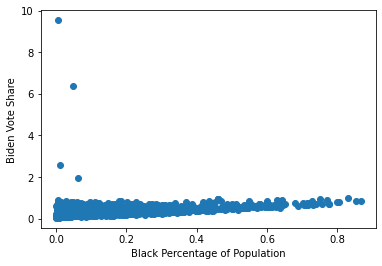

In [35]:
#Plot to see
%matplotlib inline  

plt.scatter(df['BLACK_PCT'],df['PCT_VOTE_BIDEN'])
plt.xlabel('Black Percentage of Population')
plt.ylabel('Biden Vote Share')
#plt.ylim([0,1])

a=df[df['PCT_VOTE_BIDEN']>1]
a.head()

In [36]:
df.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,...,PCT_AGE65+,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result,MED_INC,PCT_UNEMPL,PCT_POVERTY,URBAN_RURAL
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,...,0.159731,SE,0.283175,0.714368,0.270184,0,67565.0,0.054,0.112,3
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,...,0.209780,SE,0.319073,0.761714,0.224090,0,71135.0,0.062,0.089,4
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,...,0.196913,SE,0.116143,0.534512,0.457882,0,38866.0,0.078,0.255,6
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,...,0.166696,SE,0.113467,0.784263,0.206983,0,50907.0,0.073,0.178,2
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,...,0.187009,SE,0.132516,0.895716,0.095694,0,55203.0,0.046,0.131,2


We can see a few counties where the percent of vote is higher than 100%. Probably an error in data. Best to remove these rows

Text(0, 0.5, 'Biden Vote Share')

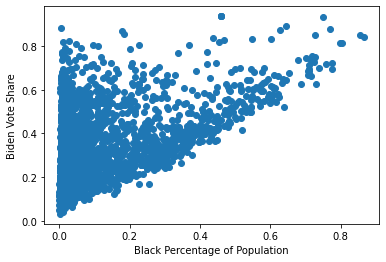

In [37]:
df=df[df['PCT_VOTE_BIDEN']<=1]
df=df[df['PCT_VOTE_TRUMP']<=1]

plt.scatter(df['BLACK_PCT'],df['PCT_VOTE_BIDEN'])
plt.xlabel('Black Percentage of Population')
plt.ylabel('Biden Vote Share')

In [38]:
df.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,...,PCT_AGE65+,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result,MED_INC,PCT_UNEMPL,PCT_POVERTY,URBAN_RURAL
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,...,0.159731,SE,0.283175,0.714368,0.270184,0,67565.0,0.054,0.112,3
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,...,0.209780,SE,0.319073,0.761714,0.224090,0,71135.0,0.062,0.089,4
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,...,0.196913,SE,0.116143,0.534512,0.457882,0,38866.0,0.078,0.255,6
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,...,0.166696,SE,0.113467,0.784263,0.206983,0,50907.0,0.073,0.178,2
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,...,0.187009,SE,0.132516,0.895716,0.095694,0,55203.0,0.046,0.131,2


Text(0, 0.5, 'Biden Vote Share')

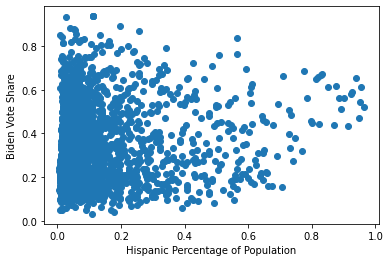

In [39]:
plt.scatter(df['HISP_PCT'],df['PCT_VOTE_BIDEN'])
plt.xlabel('Hispanic Percentage of Population')
plt.ylabel('Biden Vote Share')

Text(0, 0.5, 'Biden Vote Share')

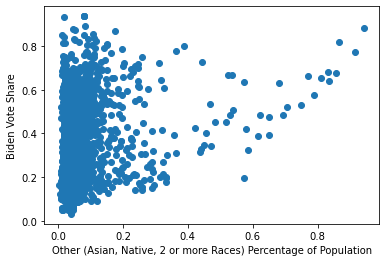

In [40]:
plt.scatter(df['OTHER_PCT'],df['PCT_VOTE_BIDEN'])
plt.xlabel('Other (Asian, Native, 2 or more Races) Percentage of Population')
plt.ylabel('Biden Vote Share')

Doesn't tell us much at lower Percentages, but above 40%, Biden seems to do better

(0.45, 0.6)

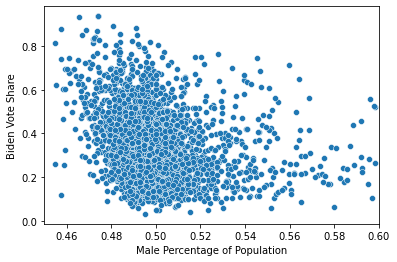

In [41]:
sns.scatterplot(y='PCT_VOTE_BIDEN', x='PCT_MALE', data=df)
#sns.scatterplot(y='PCT_VOTE_TRUMP', x='PCT_MALE', data=df)

#plt.scatter(df['PCT_FEMALE'],df['PCT_VOTE_TRUMP'],color='r')

plt.xlabel('Male Percentage of Population')
plt.ylabel('Biden Vote Share')
plt.xlim([0.45,0.6])

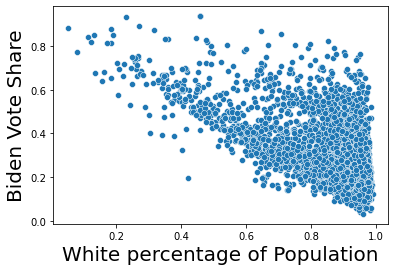

In [42]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='WHITE_PCT', data=df)
plt.xlabel("White percentage of Population",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

Although messy there does seem to be some trend here as well. When the white percentage is low, Biden vote share tends to be high. However, when the white percentage is high, the data is more spread out. Maybe there is a regional effect

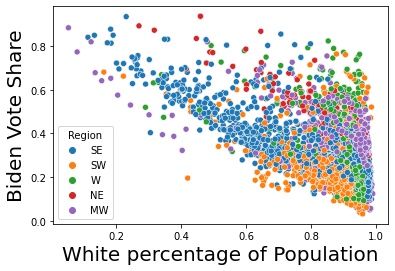

In [43]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='WHITE_PCT', hue="Region", data=df)
plt.xlabel("White percentage of Population",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

Clearly the white Percentage of the population  has a much bigger impact in the southeast and southwest than in other regions

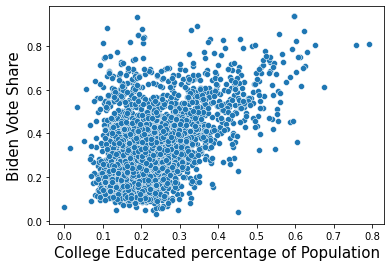

In [44]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='PCT_COLLEGE', data=df)
plt.xlabel("College Educated percentage of Population",fontsize=15)
plt.ylabel("Biden Vote Share",fontsize=15)
plt.show()

Pretty clear relationship showing improved Biden performance with percent of residents with a college degree

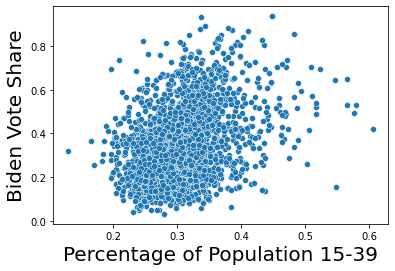

In [45]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='PCT_AGE15_39', data=df)
plt.xlabel("Percentage of Population 15-39",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

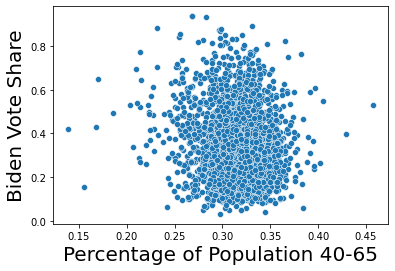

In [46]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='PCT_AGE40_65', data=df)
plt.xlabel("Percentage of Population 40-65",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

Seems like a wash. There doesn't seem to be any affect on voters aged between 40-65 with the vote share of Joe Biden in the 2020 Presidential Election

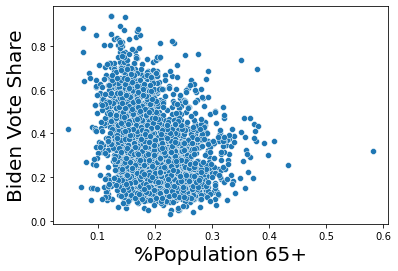

In [47]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='PCT_AGE65+', data=df)
plt.xlabel("%Population 65+",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

Now let's see if the total population of the county has an affect on the presidential vote

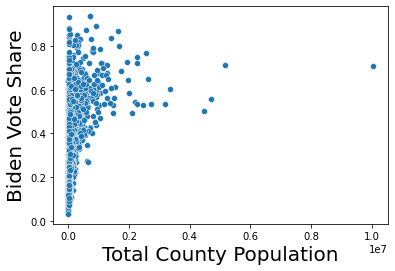

In [48]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='TOT_POP', data=df)
plt.xlabel("Total County Population",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

Hard to tell much, since most counties are on the lower end of the population axis. Best to convert the x-axis to a log-scale

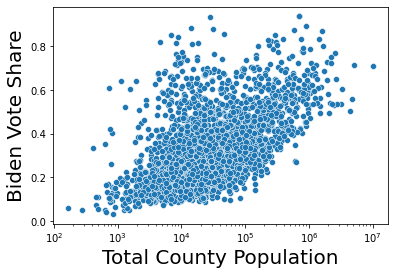

In [49]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='TOT_POP', data=df)
plt.xscale('log')
plt.xlabel("Total County Population",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

Pretty strong logarithmic trend showing that counties with larger populations tended to give Biden a larger share of the vote.

let's create a new column with the Log value of the total population for simplifying the model.

In [50]:
df['log_TOT_POP']=np.log10(df['TOT_POP'])
df.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,...,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result,MED_INC,PCT_UNEMPL,PCT_POVERTY,URBAN_RURAL,log_TOT_POP
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,...,SE,0.283175,0.714368,0.270184,0,67565.0,0.054,0.112,3,4.747171
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,...,SE,0.319073,0.761714,0.224090,0,71135.0,0.062,0.089,4,5.348760
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,...,SE,0.116143,0.534512,0.457882,0,38866.0,0.078,0.255,6,4.392451
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,...,SE,0.113467,0.784263,0.206983,0,50907.0,0.073,0.178,2,4.350132
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,...,SE,0.132516,0.895716,0.095694,0,55203.0,0.046,0.131,2,4.762123


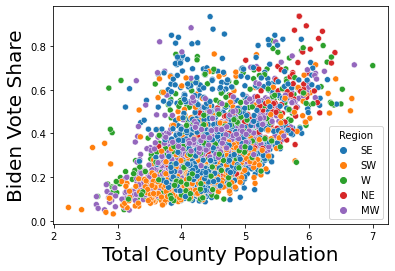

In [51]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='log_TOT_POP', hue='Region',data=df)
plt.xlabel("Total County Population",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

In [52]:
#Save Dataframe to csv

df.to_csv('County_Demo_Pres2020.csv')

In [53]:
df.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,...,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result,MED_INC,PCT_UNEMPL,PCT_POVERTY,URBAN_RURAL,log_TOT_POP
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,...,SE,0.283175,0.714368,0.270184,0,67565.0,0.054,0.112,3,4.747171
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,...,SE,0.319073,0.761714,0.224090,0,71135.0,0.062,0.089,4,5.348760
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,...,SE,0.116143,0.534512,0.457882,0,38866.0,0.078,0.255,6,4.392451
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,...,SE,0.113467,0.784263,0.206983,0,50907.0,0.073,0.178,2,4.350132
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,...,SE,0.132516,0.895716,0.095694,0,55203.0,0.046,0.131,2,4.762123


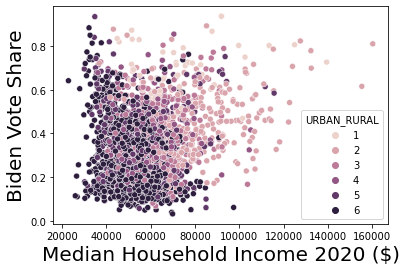

In [54]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='MED_INC',hue='URBAN_RURAL', data=df)
plt.xlabel("Median Household Income 2020 ($)",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

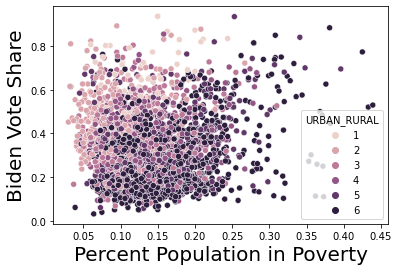

In [55]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='PCT_POVERTY',hue='URBAN_RURAL', data=df)
plt.xlabel("Percent Population in Poverty",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

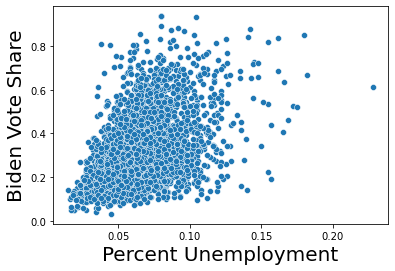

In [56]:

sns.scatterplot(y='PCT_VOTE_BIDEN',x='PCT_UNEMPL', data=df)
plt.xlabel("Percent Unemployment",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

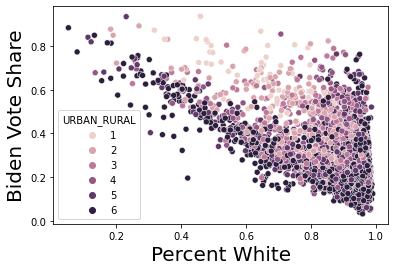

In [57]:
sns.scatterplot(y='PCT_VOTE_BIDEN',x='WHITE_PCT',hue='URBAN_RURAL', data=df)
plt.xlabel("Percent White",fontsize=20)
plt.ylabel("Biden Vote Share",fontsize=20)
plt.show()

df.to_csv('County_Demo_Pres2020.csv')

In [58]:
df.head()

,STNAME,CTYNAME,TOT_POP,PCT_MALE,PCT_FEMALE,WHITE_PCT,BLACK_PCT,HISP_PCT,OTHER_PCT,PCT_AGE15_39,...,Region,PCT_COLLEGE,PCT_VOTE_TRUMP,PCT_VOTE_BIDEN,County Result,MED_INC,PCT_UNEMPL,PCT_POVERTY,URBAN_RURAL,log_TOT_POP
0,AL,Autauga County,55869,0.484920,0.515080,0.762623,0.201131,0.029909,0.035207,0.319139,...,SE,0.283175,0.714368,0.270184,0,67565.0,0.054,0.112,3,4.747171
1,AL,Baldwin County,223234,0.484904,0.515096,0.874410,0.087769,0.047188,0.037131,0.281274,...,SE,0.319073,0.761714,0.224090,0,71135.0,0.062,0.089,4,5.348760
2,AL,Barbour County,24686,0.529207,0.470793,0.491534,0.482298,0.045248,0.024062,0.319533,...,SE,0.116143,0.534512,0.457882,0,38866.0,0.078,0.255,6,4.392451
3,AL,Bibb County,22394,0.532687,0.467313,0.767661,0.212691,0.027820,0.018487,0.333973,...,SE,0.113467,0.784263,0.206983,0,50907.0,0.073,0.178,2,4.350132
4,AL,Blount County,57826,0.492374,0.507626,0.958254,0.016913,0.096531,0.023674,0.298361,...,SE,0.132516,0.895716,0.095694,0,55203.0,0.046,0.131,2,4.762123
